In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime as dt
import importlib

import aux_funcs as aux

# Read files

In [2]:
train = aux.read_train_data()

train.csv read in 11.1 s
Mem. usage decreased to 289.19 Mb (53.1% reduction)
(20216100, 11)
   building_id  meter  timestamp  meter_reading  hour  day  year  weeknumber  \
0            0      0 2016-01-01            0.0     0    1  2016          53   
1            1      0 2016-01-01            0.0     0    1  2016          53   
2            2      0 2016-01-01            0.0     0    1  2016          53   
3            3      0 2016-01-01            0.0     0    1  2016          53   
4            4      0 2016-01-01            0.0     0    1  2016          53   

   weekday  month  log_meter_reading  
0        4      1                0.0  
1        4      1                0.0  
2        4      1                0.0  
3        4      1                0.0  
4        4      1                0.0  


In [3]:
building = aux.read_building_data()

building_metadata.csv read in 0.1 s
Mem. usage decreased to  0.03 Mb (60.3% reduction)
(1449, 7)
   site_id  building_id primary_use  square_feet  year_built  floor_count  \
0        0            0   Education         7432      2008.0          NaN   
1        0            1   Education         2720      2004.0          NaN   
2        0            2   Education         5376      1991.0          NaN   
3        0            3   Education        23685      2002.0          NaN   
4        0            4   Education       116607      1975.0          NaN   

   log_square_feet  
0         8.913550  
1         7.908387  
2         8.589700  
3        10.072597  
4        11.666565  


In [43]:
building['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [15]:
importlib.reload(aux)

<module 'aux_funcs' from 'C:\\rob\\Kaggle\\ASHRAE\\aux_funcs.py'>

In [6]:
weather_test = aux.read_weather_test_data()

weather_test.csv read in 0.2 s
Mem. usage decreased to  6.08 Mb (68.1% reduction)


In [16]:
weather_train = aux.read_weather_train_data()

weather_train.csv read in 0.3 s
Mem. usage decreased to  3.07 Mb (68.1% reduction)


In [22]:
tbw = train.join(building.loc[:,['building_id','primary_use','site_id','square_feet','log_square_feet']], on='building_id',rsuffix='r')
tbw.head()

,building_id,meter,timestamp,meter_reading,hour,day,year,weeknumber,weekday,month,log_meter_reading,building_idr,primary_use,site_id,square_feet,log_square_feet
0,0,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,0,Education,0,7432,8.913550
1,1,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,1,Education,0,2720,7.908387
2,2,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,2,Education,0,5376,8.589700
3,3,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,3,Education,0,23685,10.072597
4,4,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,4,Education,0,116607,11.666565


In [23]:
tbw = pd.merge(tbw, weather_train.loc[:,['site_id','timestamp','air_temperature']],\
               left_on=['site_id','timestamp'], right_on=['site_id','timestamp'])
tbw.head()

,building_id,meter,timestamp,meter_reading,hour,day,year,weeknumber,weekday,month,log_meter_reading,building_idr,primary_use,site_id,square_feet,log_square_feet,air_temperature
0,0,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,0,Education,0,7432,8.913550,25.0
1,1,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,1,Education,0,2720,7.908387,25.0
2,2,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,2,Education,0,5376,8.589700,25.0
3,3,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,3,Education,0,23685,10.072597,25.0
4,4,0,2016-01-01,0.0,0,1,2016,53,4,1,0.0,4,Education,0,116607,11.666565,25.0


In [56]:
use='Office'
meter = 3
ts = dt.datetime(2016, 4,6,12,0,0)

In [57]:
sec = tbw[(tbw['primary_use']==use) & (tbw['meter']==meter) & (tbw['timestamp']==ts)]
sec.head()

,building_id,meter,timestamp,meter_reading,hour,day,year,weeknumber,weekday,month,log_meter_reading,building_idr,primary_use,site_id,square_feet,log_square_feet,air_temperature
5056007,144,3,2016-04-06 12:00:00,10.000000,12,6,2016,14,2,4,2.397895,144,Office,1,57673,10.962544,11.703125
5056009,145,3,2016-04-06 12:00:00,128.630005,12,6,2016,14,2,4,4.864684,145,Office,1,14219,9.562334,11.703125
5056050,171,3,2016-04-06 12:00:00,0.000000,12,6,2016,14,2,4,0.000000,171,Office,2,131797,11.789018,21.703125
5056105,195,3,2016-04-06 12:00:00,0.000000,12,6,2016,14,2,4,0.000000,195,Office,2,9703,9.180190,21.703125
5056179,226,3,2016-04-06 12:00:00,14.653600,12,6,2016,14,2,4,2.750701,226,Office,2,74180,11.214250,21.703125


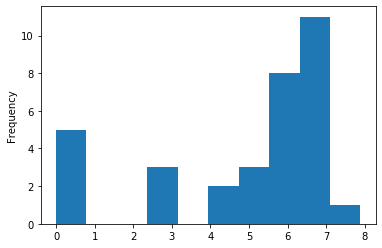

In [58]:
sec['log_meter_reading'].plot(kind='hist')

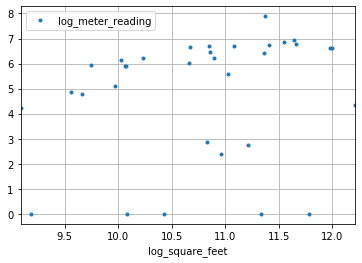

In [59]:
sec.plot(x='log_square_feet',y='log_meter_reading',marker='.',linewidth=0)
plt.grid()

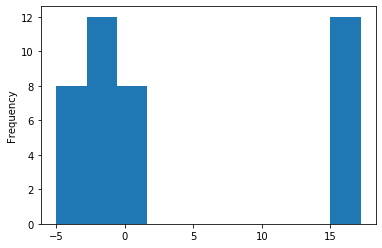

In [47]:
sec['air_temperature'].plot(kind='hist')

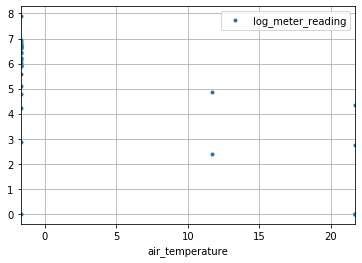

In [60]:
sec.plot(x='air_temperature',y='log_meter_reading',marker='.',linewidth=0)
plt.grid()